## Part 1 ‑ Exploratory data analysis 

The logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles.

In [1]:
# Import pandas and numpy library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import datetime as dt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import or load the json file and convert it to pandas dataframe
logins = pd.read_json('logins.json')

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
# Check the infromation from the dataframe
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# Lets sort the dataframe
logins = logins.sort_values('login_time')

In [6]:
logins.head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [7]:
# Join the dataframe with a new dataframe which includes year, month, day, hour, minutes and second column
logins = logins.join(pd.DataFrame({'y': logins.login_time.dt.year, 
                                   'm':logins.login_time.dt.month, 
                                   'd':logins.login_time.dt.day, 
                                   'h':logins.login_time.dt.hour, 
                                   'min':logins.login_time.dt.minute, 
                                   'sec':logins.login_time.dt.second}))

In [8]:
logins.head()

,login_time,y,m,d,h,min,sec
6,1970-01-01 20:12:16,1970,1,1,20,12,16
0,1970-01-01 20:13:18,1970,1,1,20,13,18
1,1970-01-01 20:16:10,1970,1,1,20,16,10
3,1970-01-01 20:16:36,1970,1,1,20,16,36
2,1970-01-01 20:16:37,1970,1,1,20,16,37


In [9]:
logins.tail()

,login_time,y,m,d,h,min,sec
93136,1970-04-13 18:48:52,1970,4,13,18,48,52
93137,1970-04-13 18:50:19,1970,4,13,18,50,19
93139,1970-04-13 18:54:02,1970,4,13,18,54,2
93141,1970-04-13 18:54:23,1970,4,13,18,54,23
93140,1970-04-13 18:57:38,1970,4,13,18,57,38


In [10]:
# Create a column named interval_time where we store- 
#if a login happened in 1st, 2nd, 3rd or 4th quarter of 15 minute time inteval

logins['interval_time'] = np.where(logins['min']<15, 0, 
                          np.where(logins['min']<30, 15, 
                          np.where(logins['min']<45, 30,
                          np.where(logins['min']<60, 45,
                                   logins.min))))

In [11]:
logins.head()

,login_time,y,m,d,h,min,sec,interval_time
6,1970-01-01 20:12:16,1970,1,1,20,12,16,0
0,1970-01-01 20:13:18,1970,1,1,20,13,18,0
1,1970-01-01 20:16:10,1970,1,1,20,16,10,15
3,1970-01-01 20:16:36,1970,1,1,20,16,36,15
2,1970-01-01 20:16:37,1970,1,1,20,16,37,15


In [12]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 6 to 93140
Data columns (total 8 columns):
login_time       93142 non-null datetime64[ns]
y                93142 non-null int64
m                93142 non-null int64
d                93142 non-null int64
h                93142 non-null int64
min              93142 non-null int64
sec              93142 non-null int64
interval_time    93142 non-null object
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 8.9+ MB


In [13]:
# Create a new column named date where we store datatime object with year/month/data
logins['date'] = pd.to_datetime(dict(year=logins.y,month=logins.m,day=logins.d))

In [14]:
logins.head()

,login_time,y,m,d,h,min,sec,interval_time,date
6,1970-01-01 20:12:16,1970,1,1,20,12,16,0,1970-01-01
0,1970-01-01 20:13:18,1970,1,1,20,13,18,0,1970-01-01
1,1970-01-01 20:16:10,1970,1,1,20,16,10,15,1970-01-01
3,1970-01-01 20:16:36,1970,1,1,20,16,36,15,1970-01-01
2,1970-01-01 20:16:37,1970,1,1,20,16,37,15,1970-01-01


In [15]:
# Add hour as a time to the date column and create a new column
logins['date_interval_h'] = logins['date']+pd.to_timedelta(logins['h'], unit='h')

In [16]:
# Add minute as time to the date_interval_h column and create a new column
logins['date_interval_m'] = logins['date_interval_h']+pd.to_timedelta(logins['interval_time'], unit='m')

In [17]:
logins.head()

,login_time,y,m,d,h,min,sec,interval_time,date,date_interval_h,date_interval_m
6,1970-01-01 20:12:16,1970,1,1,20,12,16,0,1970-01-01,1970-01-01 20:00:00,1970-01-01 20:00:00
0,1970-01-01 20:13:18,1970,1,1,20,13,18,0,1970-01-01,1970-01-01 20:00:00,1970-01-01 20:00:00
1,1970-01-01 20:16:10,1970,1,1,20,16,10,15,1970-01-01,1970-01-01 20:00:00,1970-01-01 20:15:00
3,1970-01-01 20:16:36,1970,1,1,20,16,36,15,1970-01-01,1970-01-01 20:00:00,1970-01-01 20:15:00
2,1970-01-01 20:16:37,1970,1,1,20,16,37,15,1970-01-01,1970-01-01 20:00:00,1970-01-01 20:15:00


# Grouping the data by datetime every 15 minute inteval

In [18]:
logins_interval_time = logins.groupby(['date_interval_m'])['login_time'].count()
df_time = pd.DataFrame(logins_interval_time)

In [19]:
df_time = pd.DataFrame(logins_interval_time)

In [20]:
df_time.head()

,login_time
date_interval_m,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [21]:
# Change the name of the column to number_of_logins
df_time.columns = ['number_of_logins']

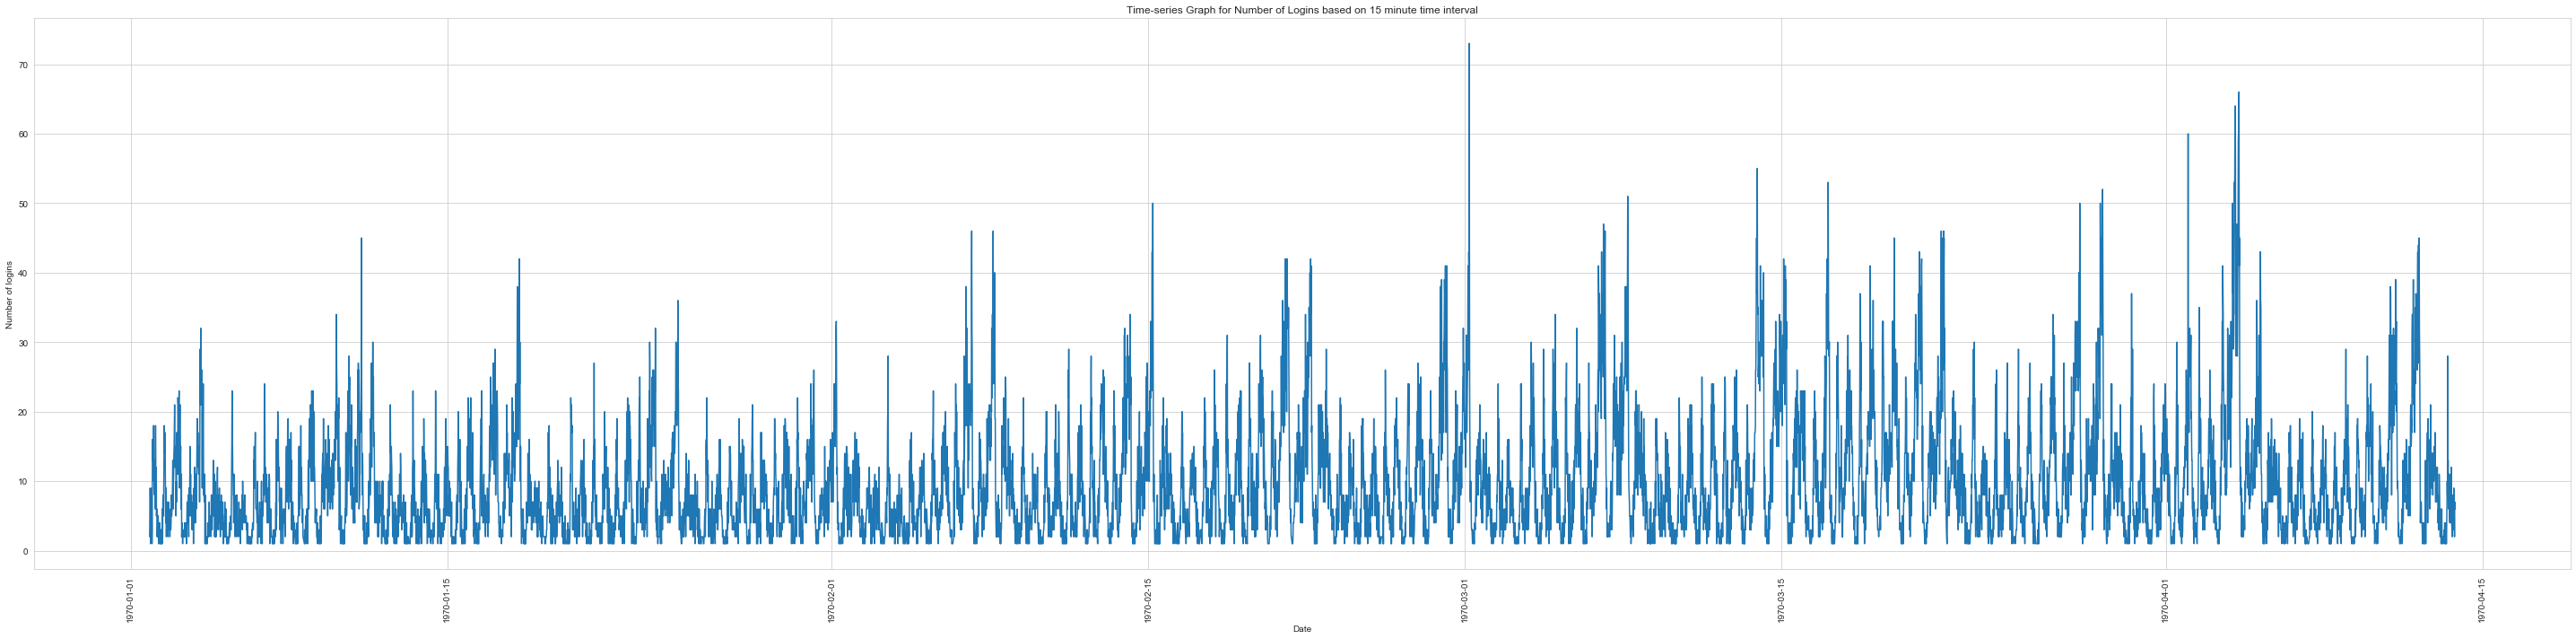

In [22]:
# Plot the graph
plt.figure(figsize=(40,10))
plt.xlabel('Date')
plt.ylabel('Number of logins')
plt.title('Time-series Graph for Number of Logins based on 15 minute time interval')
plt.plot(df_time)
plt.xticks(rotation=90)
plt.tight_layout()

The graph is noisy and difficult to interpret, so we cannot say if there is any upward or downward trend. 

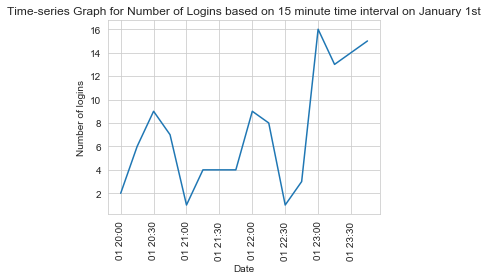

In [23]:
# Plot the graph
plt.xlabel('Date')
plt.ylabel('Number of logins')
plt.title('Time-series Graph for Number of Logins based on 15 minute time interval on January 1st')
plt.plot(df_time.loc['1970-01-01'])
plt.xticks(rotation=90)
plt.tight_layout()
# the graph is for one day 1970-01-01

On 1970-01-01, the logins were saved starting 20:00:00. The least number of logins were at 9pm and 10:30 pm. The maximum number of logins was at 11pm.

In [24]:
# Create a new dataframe to group the data by hour, day of week and month.
df_number_of_logins = df_time.reset_index()

In [25]:
# Check the dataframe
df_number_of_logins.head()

,date_interval_m,number_of_logins
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [26]:
# Join the dataframe with a new dataframe which includes year, month, day, hour, and minutes column
df_number_of_logins = df_number_of_logins.join(pd.DataFrame({'y': df_number_of_logins.date_interval_m.dt.year, 
                                                             'm':df_number_of_logins.date_interval_m.dt.month, 
                                                             'd':df_number_of_logins.date_interval_m.dt.day, 
                                                             'h':df_number_of_logins.date_interval_m.dt.hour, 
                                                             'min':df_number_of_logins.date_interval_m.dt.minute}))

In [27]:
# check the dataframe
df_number_of_logins.head()

,date_interval_m,number_of_logins,y,m,d,h,min
0,1970-01-01 20:00:00,2,1970,1,1,20,0
1,1970-01-01 20:15:00,6,1970,1,1,20,15
2,1970-01-01 20:30:00,9,1970,1,1,20,30
3,1970-01-01 20:45:00,7,1970,1,1,20,45
4,1970-01-01 21:00:00,1,1970,1,1,21,0


# Login Pattern by Hour

In [28]:
# Goup the data by hour to find out the average hourly logins
df_hourly_avg_logins = df_number_of_logins.groupby('h')['number_of_logins'].mean().reset_index()

In [29]:
# check the dataframe 
df_hourly_avg_logins

,h,number_of_logins
0,0,14.688725
1,1,15.482843
2,2,14.356436
3,3,12.017413
4,4,12.744304
5,5,8.226257
6,6,3.780731
7,7,2.383041
8,8,2.486322
9,9,3.986945


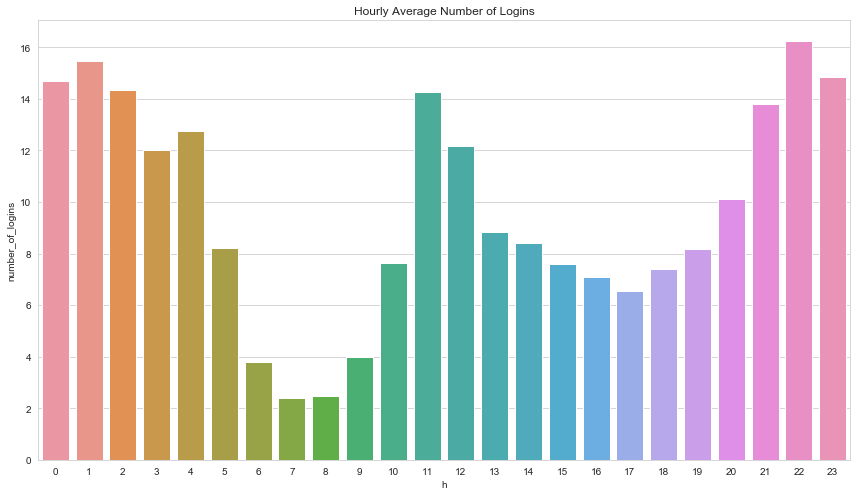

In [30]:
# Plot the graph
plt.figure(figsize=(12,7))
plt.xlabel('Hours')
plt.ylabel('Average Number of logins')
plt.title('Hourly Average Number of Logins')
sns.barplot(data=df_hourly_avg_logins,x='h',y='number_of_logins')
plt.tight_layout()

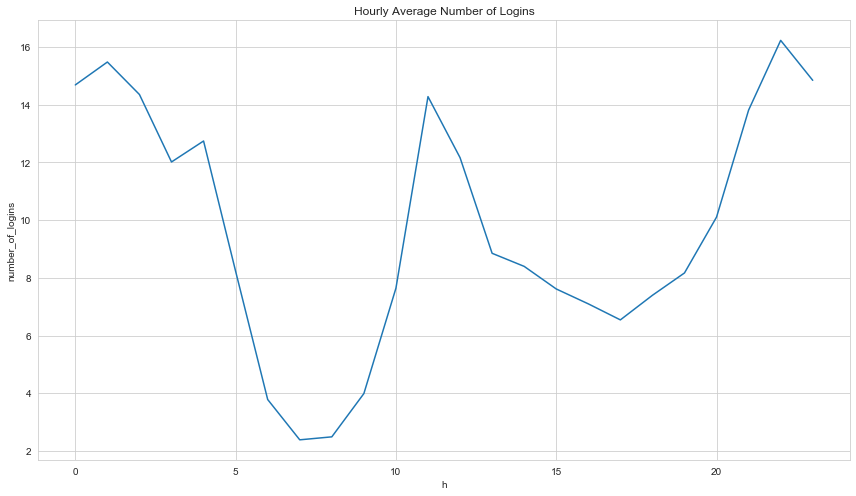

In [31]:
# Plot the graph
plt.figure(figsize=(12,7))
plt.xlabel('Hours')
plt.ylabel('Average Number of logins')
plt.title('Hourly Average Number of Logins')
sns.lineplot(data=df_hourly_avg_logins, x='h', y='number_of_logins')
plt.tight_layout()

The bar plot and line plot show us that the peak hours are at midnight to 1 am. Then the number of logins drops until 7am. At 7am to 8am we have the lowest average number of logins. The average number of logins increases up until 11 am. Then, it follows a downward trend till 5pm. After 5pm, the average number of logins increases and follow an upward trend. 

Most of the people sleep close to midnight, and wakes up around 6-8am in the morning. This might have affected the drop in average number of logins. People start their day or go to work after 8 am till 11 am. Most of the people stay busy at work up to 5 pm. At 5pm they finish their work.

# Logins Pattern by Day of Week

In [32]:
import calendar

# Get the weekday index, between 0 and 6
df_number_of_logins['day_of_week'] = df_number_of_logins['date_interval_m'].apply(lambda x: x.weekday()) 
df_number_of_logins['day_of_week'] = df_number_of_logins['day_of_week'].apply(lambda x: calendar.day_name[x])
df_number_of_logins.head()

,date_interval_m,number_of_logins,y,m,d,h,min,day_of_week
0,1970-01-01 20:00:00,2,1970,1,1,20,0,Thursday
1,1970-01-01 20:15:00,6,1970,1,1,20,15,Thursday
2,1970-01-01 20:30:00,9,1970,1,1,20,30,Thursday
3,1970-01-01 20:45:00,7,1970,1,1,20,45,Thursday
4,1970-01-01 21:00:00,1,1970,1,1,21,0,Thursday


In [33]:
# Group the data by day_of_week to find out the average number of logins
df_day_of_week_avg_logins = df_number_of_logins.groupby('day_of_week')['number_of_logins'].mean().reset_index()

In [34]:
# Check the dataframe
df_day_of_week_avg_logins.sort_values('day_of_week')

,day_of_week,number_of_logins
0,Friday,10.893983
1,Monday,6.535556
2,Saturday,13.771855
3,Sunday,12.811707
4,Thursday,9.336456
5,Tuesday,7.396648
6,Wednesday,8.102665


In [35]:
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'Sunday': 0,
 'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6}

In [36]:
df_day_of_week_avg_logins['day_id'] = df_day_of_week_avg_logins['day_of_week'].map(sorterIndex)
df_day_of_week_avg_logins.sort_values('day_id', inplace=True)
df_day_of_week_avg_logins

,day_of_week,number_of_logins,day_id
3,Sunday,12.811707,0
1,Monday,6.535556,1
5,Tuesday,7.396648,2
6,Wednesday,8.102665,3
4,Thursday,9.336456,4
0,Friday,10.893983,5
2,Saturday,13.771855,6


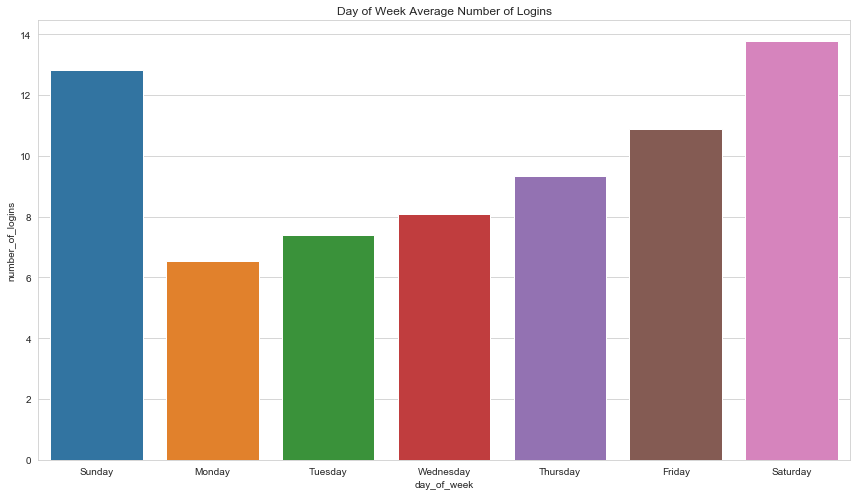

In [37]:
# Plot the graph
plt.figure(figsize=(12,7))
plt.xlabel('Day of Week')
plt.ylabel('Average Number of logins')
plt.title('Day of Week Average Number of Logins')
sns.barplot(data=df_day_of_week_avg_logins,x='day_of_week',y='number_of_logins')
plt.tight_layout()

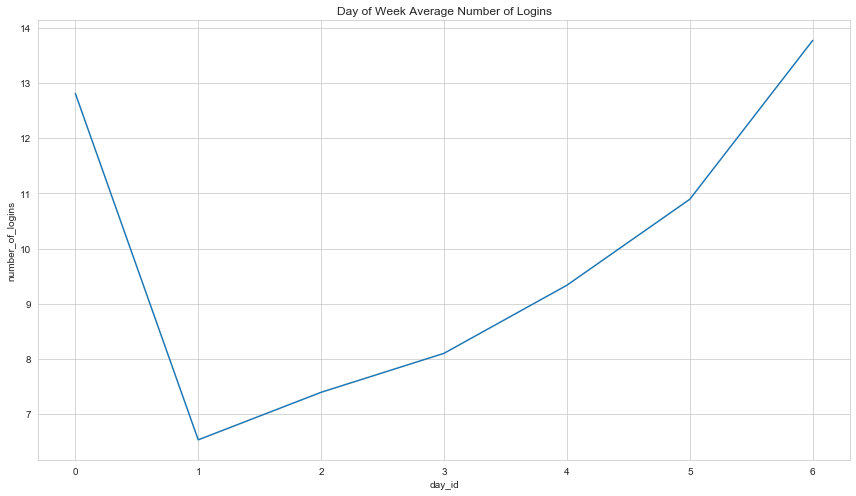

In [38]:
# Plot the graph
plt.figure(figsize=(12,7))
plt.xlabel('Day of Week')
plt.ylabel('Average Number of logins')
plt.title('Day of Week Average Number of Logins')
sns.lineplot(data=df_day_of_week_avg_logins, x='day_id', y='number_of_logins')
plt.tight_layout()

The barplot and lineplot shows a downward trend from Sunday to Monday. Then, there is an upward trend from Monday. The maximum average number of logins is on Saturday and the minimum average number of logins is on Monday.

Most of the people finish weekend and start work week on Monday. This might have affected the drop, in the number of logins. Most of the people have off day on weekends, and this tells us that most of our user logins on weekends.

# Login Pattern by Month

In [39]:
# Group the data by month to find out the average monthly logins
df_monthly_avg_logins = df_number_of_logins.groupby('m')['number_of_logins'].mean().reset_index()

In [40]:
df_monthly_avg_logins.head()

,m,number_of_logins
0,1,7.703663
1,2,9.630367
2,3,11.750174
3,4,11.331376


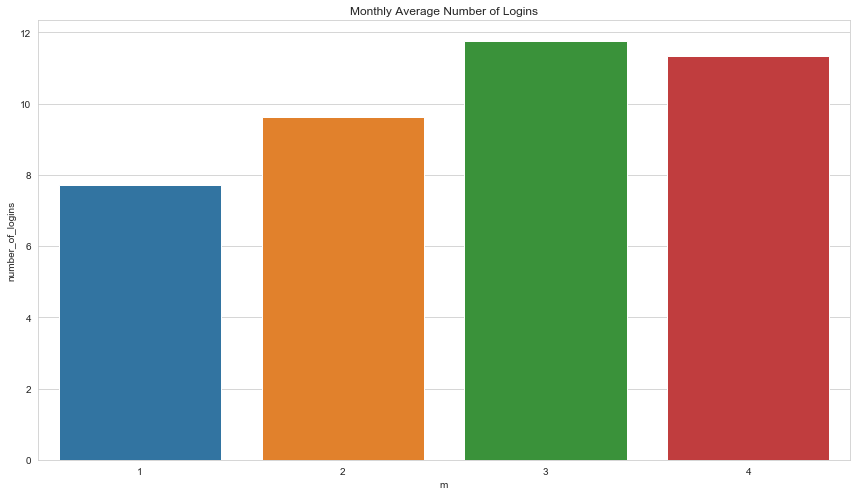

In [41]:
# plot the graph
plt.figure(figsize=(12,7))
plt.xlabel('Months')
plt.ylabel('Average Number of logins')
plt.title('Monthly Average Number of Logins')
sns.barplot(data=df_monthly_avg_logins,x='m',y='number_of_logins')
plt.tight_layout()

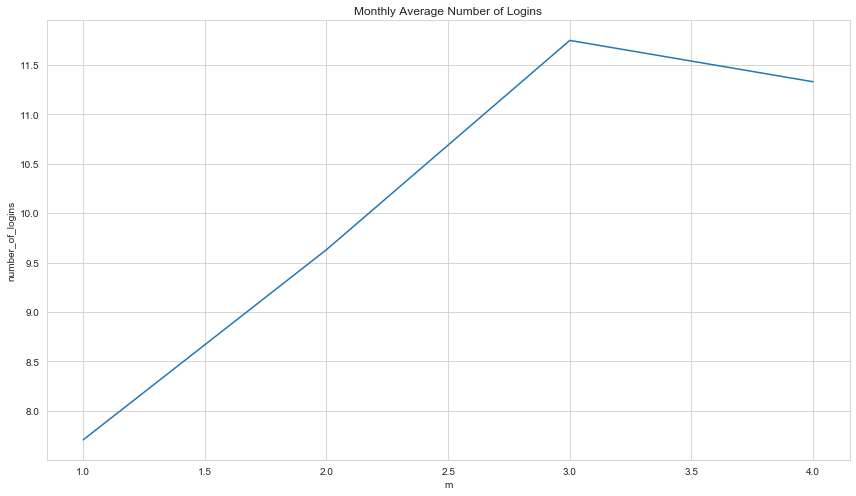

In [42]:
# Plot the graph
plt.figure(figsize=(12,7))
plt.xlabel('Months')
plt.ylabel('Average Number of logins')
plt.title('Monthly Average Number of Logins')
sns.lineplot(data=df_monthly_avg_logins, x='m', y='number_of_logins')
plt.tight_layout()

The bar plot and line plot, Monthly Average Number of Logins shows us an upward trend from January till March. After March, the average number of logins has slightly decreased. We cannot say there is a downward trend. We need to collect more data for following months to confirm any trend.